In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import pickle
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
df = pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\Yuvaraj\Mini Project\water quality\water_quality_data.csv")
df

,Time,Discharge,Season,Temperature_C,pH_Level,Water_Quality_Percentage
0,3174,498.168254,Winter,18.680674,6.371073,34.870149
1,3507,448.728330,Spring,1.636041,7.749829,32.257153
2,860,231.744036,Autumn,-4.012634,8.204278,40.584906
3,1294,311.506398,Spring,9.510144,6.964599,33.527190
4,1130,373.961015,Spring,16.867853,6.103952,30.378939
...,...,...,...,...,...,...
3995,3561,430.673681,Summer,6.271894,8.863191,47.836574
3996,2466,408.644430,Summer,5.701081,8.731929,48.843264
3997,2737,256.411924,Spring,15.768279,8.886902,58.049365
3998,849,219.248651,Autumn,4.374804,7.283744,37.527157


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Time                      4000 non-null   int64  
 1   Discharge                 4000 non-null   float64
 2   Season                    4000 non-null   object 
 3   Temperature_C             4000 non-null   float64
 4   pH_Level                  4000 non-null   float64
 5   Water_Quality_Percentage  4000 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 187.6+ KB


In [6]:
df.describe()

,Time,Discharge,Temperature_C,pH_Level,Water_Quality_Percentage
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1867.048500,251.023025,14.626824,7.523145,49.720575
std,1070.540534,144.369701,11.619028,0.861065,17.583859
min,1.000000,0.194181,-4.992539,6.003804,0.000000
25%,938.000000,122.600062,4.582696,6.801706,37.155325
50%,1863.000000,257.757102,14.480804,7.537783,49.784001
75%,2845.000000,375.992842,24.691794,8.252363,61.980935
max,3648.000000,499.856931,34.961980,8.999548,100.000000


In [7]:
df.isnull().sum()

Time                        0
Discharge                   0
Season                      0
Temperature_C               0
pH_Level                    0
Water_Quality_Percentage    0
dtype: int64

In [8]:
df.fillna(df.mean(),inplace = True)

c:\Users\lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [9]:
df.isnull().sum()

Time                        0
Discharge                   0
Season                      0
Temperature_C               0
pH_Level                    0
Water_Quality_Percentage    0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Apply encoding only to object (categorical) columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])

In [11]:
x = df.drop(['Water_Quality_Percentage'],axis=1)
x

,Time,Discharge,Season,Temperature_C,pH_Level
0,3174,498.168254,3,18.680674,6.371073
1,3507,448.728330,1,1.636041,7.749829
2,860,231.744036,0,-4.012634,8.204278
3,1294,311.506398,1,9.510144,6.964599
4,1130,373.961015,1,16.867853,6.103952
...,...,...,...,...,...
3995,3561,430.673681,2,6.271894,8.863191
3996,2466,408.644430,2,5.701081,8.731929
3997,2737,256.411924,1,15.768279,8.886902
3998,849,219.248651,0,4.374804,7.283744


In [12]:
y = df['Water_Quality_Percentage']
y

0       34.870149
1       32.257153
2       40.584906
3       33.527190
4       30.378939
          ...    
3995    47.836574
3996    48.843264
3997    58.049365
3998    37.527157
3999    13.371893
Name: Water_Quality_Percentage, Length: 4000, dtype: float64

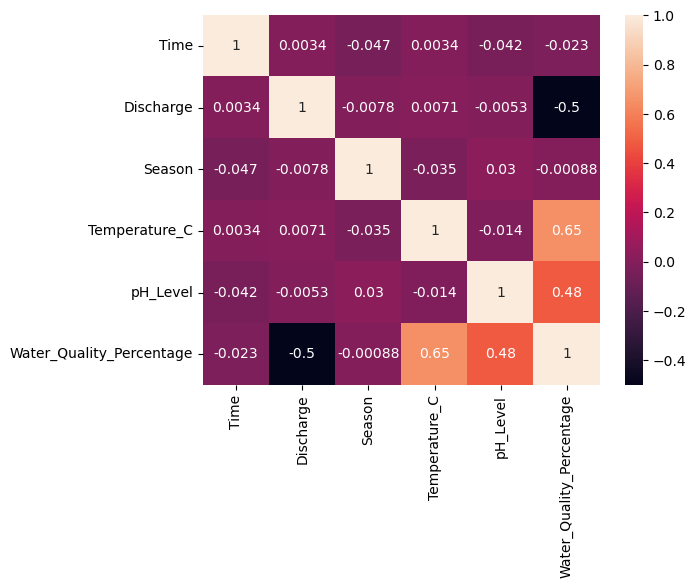

In [13]:
sns.heatmap(df.corr(),annot = True)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)



In [15]:
mae = []
mse = []
rmse = []
r2 = []

def performance_metrics(algorithm, predict, testY):
    predict = predict.astype('float')
    testY = testY.astype('float')
    
    # Calculate regression metrics
    mean_abs_error = mean_absolute_error(testY, predict)
    mean_sqr_error = mean_squared_error(testY, predict)
    root_mean_sqr_error = np.sqrt(mean_sqr_error)
    r_squared = r2_score(testY, predict)
    # Append metrics to the lists
    mae.append(mean_abs_error)
    mse.append(mean_sqr_error)
    rmse.append(root_mean_sqr_error)
    r2.append(r_squared)
    
    print(algorithm + ' Mean Absolute Error : ' + str(mean_abs_error))
    print(algorithm + ' Mean Squared Error  : ' + str(mean_sqr_error))
    print(algorithm + ' Root Mean Squared Error : ' + str(root_mean_sqr_error))
    print(algorithm + ' R² Score : ' + str(r_squared))
    

    # Plotting best-fit line
    plt.scatter(testY, predict)
    plt.plot([testY.min(), testY.max()], [testY.min(), testY.max()], '--r', lw=2)  # best-fit line
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(algorithm + ' Predictions vs True Values')
    plt.show()

Pretrained KNN model is loaded.
KNN Regressor model Mean Absolute Error : 11.03432668581825
KNN Regressor model Mean Squared Error  : 195.15989903335975
KNN Regressor model Root Mean Squared Error : 13.969964174376388
KNN Regressor model R² Score : 0.39064058965842274


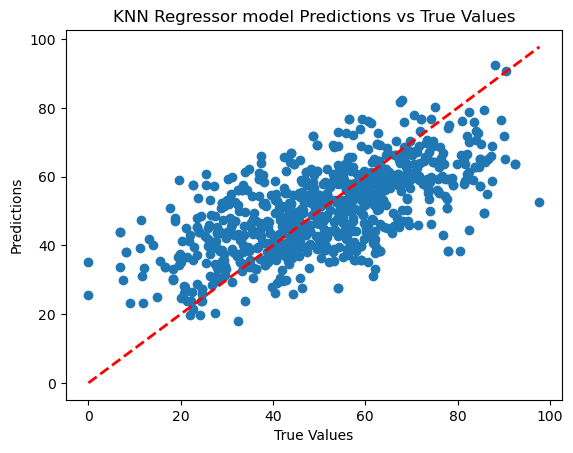

In [16]:
from sklearn.neighbors import KNeighborsRegressor

# Path to save/load the KNN model
knn_model_path = 'model/KNN.joblib'

os.makedirs('model', exist_ok=True)

# Check if the pretrained model exists
if os.path.exists(knn_model_path):
    knn = joblib.load(knn_model_path)
    print('Pretrained KNN model is loaded.')
else:
    knn = KNeighborsRegressor()
    knn.fit(x_train, y_train)
    joblib.dump(knn, knn_model_path)
    print('KNN model trained and saved.')

# Predict using the model
y_pred = knn.predict(x_test)

# Evaluate the model (assuming you have a function defined called `performance_metrics`)
performance_metrics('KNN Regressor model', y_pred, y_test)


pretrained model is loaded
Random Forest Regressor model Mean Absolute Error : 2.3755949739093625
Random Forest Regressor model Mean Squared Error  : 11.460580912386167
Random Forest Regressor model Root Mean Squared Error : 3.385347975081168
Random Forest Regressor model R² Score : 0.9642159436363009


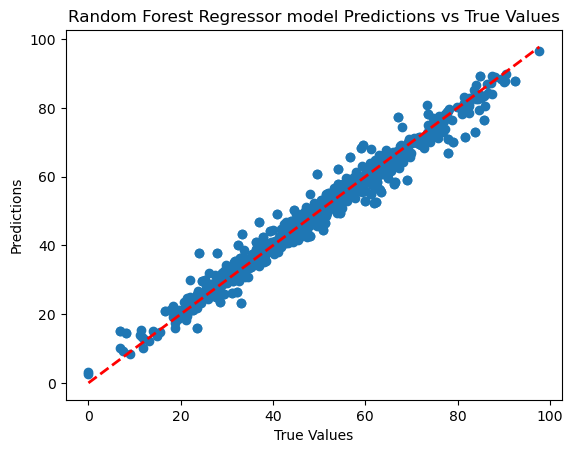

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import numpy as np
rf_model_path = 'model/RandomForest.joblib'
if os.path.exists(rf_model_path):
    rf= joblib.load(rf_model_path)
    print('pretrained model is loaded')
else:
    rf=RandomForestRegressor()
    rf.fit(x_train, y_train)
    joblib.dump(rf, rf_model_path)
y_pred = rf.predict(x_test)
y_pred
# Evaluate the model
performance_metrics('Random Forest Regressor model', y_pred, y_test)

In [18]:
test1 = pd.read_csv(r'Testdata.csv')
test1

,Unnamed: 0,Time,Discharge,Season,Temperature_C,pH_Level,Water_Quality_Percentage
0,2424,3120,200.012613,3,10.389303,6.978318,43.155376
1,2795,1155,416.356967,0,8.713559,8.288544,51.722796
2,1544,3389,1.540338,0,22.576685,7.707844,69.478840
3,1907,957,215.327051,2,29.658043,6.901466,64.505159
4,1359,1202,426.293635,3,24.864128,8.499019,61.615524
5,3354,1970,162.978976,2,23.664252,6.120374,49.133859
6,3278,2945,185.089162,0,28.791903,8.684608,77.711189
7,957,1460,248.678240,1,29.499585,7.013451,56.373082
8,1076,2681,379.648442,2,12.810961,7.433999,36.658263
9,3334,1863,123.529023,1,22.085799,8.260830,73.675937


In [19]:
test1 = test1.drop(['Unnamed: 0','Water_Quality_Percentage'],axis=1)
test1

,Time,Discharge,Season,Temperature_C,pH_Level
0,3120,200.012613,3,10.389303,6.978318
1,1155,416.356967,0,8.713559,8.288544
2,3389,1.540338,0,22.576685,7.707844
3,957,215.327051,2,29.658043,6.901466
4,1202,426.293635,3,24.864128,8.499019
5,1970,162.978976,2,23.664252,6.120374
6,2945,185.089162,0,28.791903,8.684608
7,1460,248.678240,1,29.499585,7.013451
8,2681,379.648442,2,12.810961,7.433999
9,1863,123.529023,1,22.085799,8.260830


In [20]:
pred = rf.predict(test1)
pred

array([43.00208812, 50.19850915, 70.87920862, 64.10196791, 61.03792688,
       49.48724413, 78.8633215 , 58.56963056, 36.88140141, 73.54347068,
       42.14787054, 39.73007373, 46.44553321, 56.89716615, 39.17509511,
       40.23466761, 72.86190503, 57.74377173, 31.92162888, 54.39474113])

In [21]:
test1['Predicted Percentage']=pred
test1

,Time,Discharge,Season,Temperature_C,pH_Level,Predicted Percentage
0,3120,200.012613,3,10.389303,6.978318,43.002088
1,1155,416.356967,0,8.713559,8.288544,50.198509
2,3389,1.540338,0,22.576685,7.707844,70.879209
3,957,215.327051,2,29.658043,6.901466,64.101968
4,1202,426.293635,3,24.864128,8.499019,61.037927
5,1970,162.978976,2,23.664252,6.120374,49.487244
6,2945,185.089162,0,28.791903,8.684608,78.863321
7,1460,248.678240,1,29.499585,7.013451,58.569631
8,2681,379.648442,2,12.810961,7.433999,36.881401
9,1863,123.529023,1,22.085799,8.260830,73.543471
